# Machiene Learning Project with The Loan Dataset

Research Question: What features predict customers' loan success?

The Dataset: 

The dataset includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                                                                          |
| Gender         | The gender of applicant                                                               |

### Importing the python packages

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Reading the Dataset

In [6]:
df = pd.read_csv('loan_train.csv') 

print(df.columns)

df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'Gender'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender
0,0,0,PAIDOFF,1000,30,9/8/16,10/7/16,45,male
1,2,2,PAIDOFF,1000,30,9/8/16,10/7/16,33,female
2,3,3,PAIDOFF,1000,15,9/8/16,9/22/16,27,male
3,4,4,PAIDOFF,1000,30,9/9/16,10/8/16,28,female
4,6,6,PAIDOFF,1000,30,9/9/16,10/8/16,29,male


In [7]:
df.shape

(346, 9)

### # of people who have paid the loan vs not

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

### Converting date to time object

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,male


### Checking whether day of the week has an effect

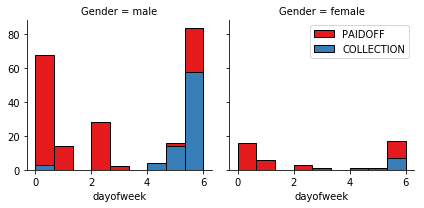

In [10]:
import seaborn as sns

df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

According to the bar charts above, people who get the loan at the end of the week dont pay it off.


### Creating a column with binary values representing the start vs. end of the week

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,male,4,1


### Proportion of males vs. females paying their loans

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Accordingly, females are more likely to pay their loans than males

### Converting gender to numerical values

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,4,1


## PREDICTIVE MODELING

### Defining X

In [14]:
X = df[['Principal','terms','age','Gender','weekend']]
X[0:5]

,Principal,terms,age,Gender,weekend
0,1000,30,45,0,0
1,1000,30,33,1,0
2,1000,15,27,0,0
3,1000,30,28,1,1
4,1000,30,29,0,1


### Checking target  variable labels

In [15]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Normalizing Data

In [16]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003]])

## Classification Method: K Nearest Neighbor(KNN) 

### Splitting training and testing data sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


### Modeling

In [31]:
from sklearn.neighbors import KNeighborsClassifier

k = 8

KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

### Prediction

In [32]:
y_pred = KNN.predict(X_test)
y_pred [0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Accuracy tests

In [33]:
from sklearn import metrics
print('Train set Accuracy:', metrics.accuracy_score(y_train, KNN.predict(X_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, y_pred))

Train set Accuracy: 0.7753623188405797
Test set Accuracy: 0.7142857142857143


## Classification Method: Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

### Modeling

In [22]:
LoanTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
LoanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
LoanTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction 

In [26]:
PredTree = LoanTree.predict(X_test)

print(PredTree [0:5])
print(y_test [0:5])

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


### Evaluation

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt 
print('DecisionTree Accuracy: ', metrics.accuracy_score(y_test, PredTree))

DecisionTree Accuracy:  0.6142857142857143
